In [23]:
import pandas as pd

# Assuming df_features is loaded correctly as shown
df_features = pd.read_csv("/home/j.maragall/Pipeline_CellMapping/HE_9fs.csv")

# Assuming df_presentation is loaded correctly and unique_id is created as shown
df_presentation = pd.read_csv('/home/j.maragall/PRESENTATION_FEATURES.csv')
df_presentation.fillna(0, inplace=True)
df_presentation['unique_id'] = df_presentation.apply(lambda x: f"ROI_{int(x['minr'])}_{int(x['maxr'])}_{int(x['minc'])}_{int(x['maxc'])}", axis=1)
unique_ids = df_presentation['unique_id'].copy()

# Create the aligned_unique_id in df_features based on existing data (if needed)
# For example, if df_features already correctly matches the unique_id pattern and just needs renaming:
df_features['aligned_unique_id'] = df_features['ROI_ID']  # Adjust if your identifier column is named differently

# Now, sort both DataFrames by their aligned unique identifiers
df_features_sorted = df_features.sort_values(by='aligned_unique_id').reset_index(drop=True)
#df_presentation_sorted = df_features_sorted.drop('labels', axis=1)
df_presentation_sorted = df_presentation.sort_values(by='unique_id').reset_index(drop=True)
#df_presentation_sorted = df_presentation_sorted.drop('presentation_labels', axis=1)

import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Example matrix A with dimensions (n_samples, n_features)
features_only_features = df_features_sorted.drop(['aligned_unique_id', 'ROI_ID'], axis=1)

# Impute all NaN values with 0
features_only_features.fillna(0, inplace=True)

from sklearn.preprocessing import MinMaxScaler

# Assuming 'features_only_features' DataFrame already has the desired features and column names
column_names = features_only_features.columns

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_features = pd.DataFrame(scaler.fit_transform(features_only_features), columns=column_names)


features_only_presentation = df_presentation_sorted.drop(['unique_id'], axis=1).fillna(0)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example DataFrame df_ae_transformed and features_only_presentation
# Ensure df_ae_transformed['Val'] and features_only_presentation are defined

# Define a range of alpha values to iterate over
alpha_values = np.linspace(0.23, 1.0, 1)  # for example, from 0.1 to 1.0 in 10 steps

# List to store the results
results = []

# Loop over each alpha value
for alpha in alpha_values:
    # Scale 'Val' by current alpha
    scaled_val = (features_only_features['Contrast'] * alpha).fillna(0)

    # Multiply features_only_presentation with the scaled 'Val'
    weighted_combined = features_only_presentation.mul(scaled_val, axis=0)

    # UMAP models for embedding
    umap_model_features = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
    umap_model_presentation = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")

    # Compute embeddings
    weighted_embedding_features = umap_model_features.fit_transform(weighted_combined)
    deep_embedding_presentation = umap_model_presentation.fit_transform(features_only_presentation)

    # Calculate cosine similarity
    similarity = cosine_similarity(weighted_embedding_features, deep_embedding_presentation)
    
    # Store alpha and the first value of cosine similarity matrix (assuming comparison of the whole set to itself)
    results.append({'alpha': alpha, 'cosine_similarity': similarity[0][0]})

# Create a DataFrame to hold the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


#results_df.to_csv('Smoothness_Weighted_CODEX_.csv', index=False)


/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

   alpha  cosine_similarity
0   0.23           0.347726


In [34]:
features_only_presentation

,channel_0_mean,channel_0_std,channel_0_variance,channel_0_entropy,channel_1_mean,channel_1_std,channel_1_variance,channel_1_entropy,channel_2_mean,channel_2_std,...,channel_43_max_intensity,channel_43_min_intensity,channel_43_sum_intensity,centroid_x,centroid_y,orientation,minr,minc,maxr,maxc
0,84.38991,17.999983,323.99936,4.026591,0.0,0.0,0.0,0.0,3.788991,1.242027,...,3.0,0.0,114.0,10006.8490,3387.1055,-1.454591,10000.0,3378.0,10015.0,3398.0
1,101.05576,26.657553,710.62510,4.345480,0.0,0.0,0.0,0.0,1.308550,0.569975,...,2.0,0.0,85.0,10009.5720,2969.5874,-0.315660,10000.0,2961.0,10020.0,2980.0
2,97.38747,38.415085,1475.71890,4.690289,0.0,0.0,0.0,0.0,9.159544,6.781293,...,8.0,0.0,280.0,10009.7090,2289.4473,1.082512,10000.0,2279.0,10022.0,2302.0
3,80.42742,19.398691,376.30923,4.092836,0.0,0.0,0.0,0.0,6.491935,3.397095,...,3.0,0.0,142.0,10009.9150,2216.3953,0.324933,10001.0,2208.0,10019.0,2226.0
4,133.84969,43.554058,1896.95590,4.415061,0.0,0.0,0.0,0.0,0.138037,0.344939,...,4.0,0.0,66.0,10015.3620,1252.8497,-0.144134,10001.0,1247.0,10033.0,1261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,70.83193,10.614181,112.66083,3.494312,0.0,0.0,0.0,0.0,2.453782,0.914385,...,2.0,0.0,54.0,10001.5380,1683.1093,0.984343,9995.0,1676.0,10008.0,1692.0
22276,173.47586,35.546390,1263.54600,3.732845,0.0,0.0,0.0,0.0,1.910345,0.795827,...,2.0,0.0,101.0,10002.0625,2662.0344,-0.027262,9995.0,2657.0,10011.0,2670.0
22277,100.35294,24.362469,593.52985,4.354911,0.0,0.0,0.0,0.0,1.720588,0.698646,...,3.0,0.0,106.0,10007.5370,2996.4302,0.154985,9995.0,2990.0,10020.0,3005.0
22278,98.86434,39.040836,1524.18700,4.479592,0.0,0.0,0.0,0.0,2.259690,0.857255,...,2.0,0.0,132.0,10004.6590,2643.7327,0.294204,9996.0,2636.0,10015.0,2652.0


UMAP Parameters:


NameError: name 'umap_model' is not defined

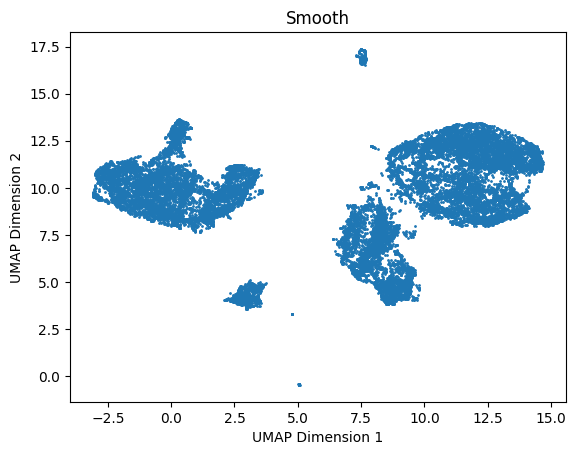

In [24]:
# Plot the results
plt.scatter(weighted_embedding_features[:, 0], weighted_embedding_features[:, 1], s=1)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Smooth')

# Print the parameters
print("UMAP Parameters:")
print(f"n_neighbors: {umap_model.n_neighbors}")
print(f"min_dist: {umap_model.min_dist}")
print(f"n_components: {umap_model.n_components}")
print(f"metric: {umap_model.metric}")

plt.show()


In [20]:
 features_only_features

,Mean_Intensity,Std_Intensity,Variance_Intensity,Min_Intensity,Max_Intensity,Median_Intensity,Contrast,Entropy,Smoothness
0,104.717125,29.133739,848.774722,55,187,100.5,132,6.334382,0.998823
1,121.251549,32.224006,1038.386537,60,205,123.0,145,6.636855,0.999038
2,117.904084,56.102448,3147.484627,30,233,112.0,203,7.295248,0.999682
3,123.260753,40.337011,1627.074481,62,235,117.0,173,6.815238,0.999386
4,105.349693,37.295460,1390.951334,44,210,104.0,166,6.818206,0.999282
...,...,...,...,...,...,...,...,...,...
22275,115.338936,30.052708,903.165235,63,189,111.0,126,6.394325,0.998894
22276,130.636782,68.305174,4665.596808,13,219,144.0,206,7.001019,0.999786
22277,106.006127,28.545264,814.832070,66,192,98.0,126,6.174077,0.998774
22278,115.633075,35.082328,1230.769759,30,216,109.0,186,6.701400,0.999188


In [28]:
embedding_HE = umap_model_features.fit_transform(features_only_features)

/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f

UMAP Parameters:


NameError: name 'umap_model' is not defined

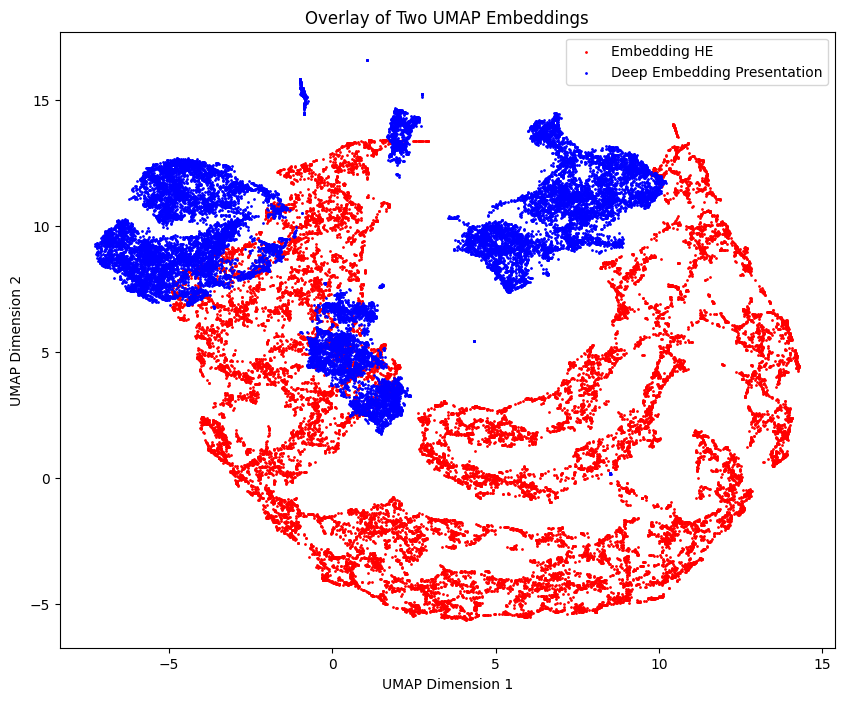

In [35]:
import matplotlib.pyplot as plt

# Assuming you have the following data and model ready:
# embedding_HE and deep_embedding_presentation are the two embeddings you want to plot
# umap_model is your UMAP model instance

# Plot the results on the same axes
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
plt.scatter(embedding_HE[:, 0], embedding_HE[:, 1], s=1, color='red', label='Embedding HE')
plt.scatter(deep_embedding_presentation[:, 0], deep_embedding_presentation[:, 1], s=1, color='blue', label='Deep Embedding Presentation')

# Labeling the plot
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Overlay of Two UMAP Embeddings')
plt.legend()  # Show the legend to distinguish the plots

# Print the parameters (assuming the same model was used for both embeddings)
print("UMAP Parameters:")
print(f"n_neighbors: {umap_model.n_neighbors}")
print(f"min_dist: {umap_model.min_dist}")
print(f"n_components: {umap_model.n_components}")
print(f"metric: {umap_model.metric}")

plt.show()


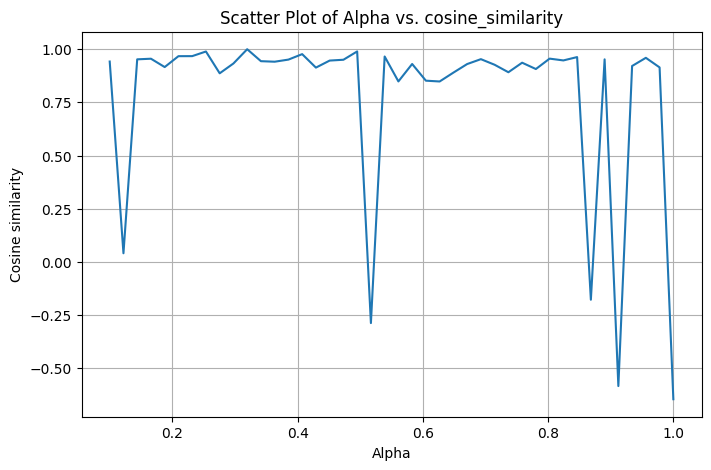

In [2]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(results_df['alpha'], results_df['cosine_similarity'])
plt.title('Scatter Plot of Alpha vs. cosine_similarity')
plt.xlabel('Alpha')
plt.ylabel('Cosine similarity')
plt.grid(True)
plt.show()